DECISION TREE

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le=LabelEncoder()
dataset["Gender"]=le.fit_transform(dataset["Gender"])  #for transforming column "gender" into 1 or 0

In [5]:
dataset.drop(columns=["User ID","Gender"],inplace=True)

In [6]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)  #for scaling the variables
x 

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
#dt=DecisionTreeClassifier() #DecisionTreeClassifier(gini,entropy,log_loss) <- these are criterion , automatically selects best criterion 
dt=DecisionTreeClassifier(max_depth=5)  #pre-pruning
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [13]:
#post Pruning
for i in range (1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_test,y_test)*100 , dt2.score(x_train,y_train)*100 , i)  #look for the least diff. b/w test and train score

90.0 82.1875 1
91.25 91.875 2
91.25 91.875 3
91.25 93.125 4
90.0 93.4375 5
86.25 95.0 6
85.0 96.875 7
85.0 97.1875 8
85.0 98.125 9
85.0 98.4375 10
83.75 99.0625 11
83.75 99.375 12
83.75 99.6875 13
83.75 99.6875 14
83.75 99.6875 15
83.75 99.6875 16
83.75 99.6875 17
83.75 99.6875 18
83.75 99.6875 19


In [14]:
dt.score(x_test,y_test)*100

90.0

In [15]:
dt.score(x_train,y_train)*100

93.4375

In [16]:
dt.predict([[-1.781797,	-1.490046]])

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [17]:
from sklearn.tree import plot_tree

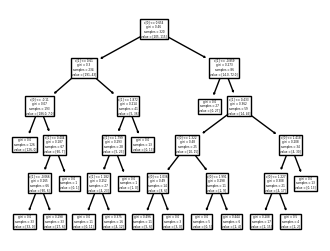

In [18]:
plt.figure(figsize=(4,3))
plot_tree(dt)
plt.savefig("tree.jpg")  #for saving image into local folder 
plt.show() 

In [19]:
from mlxtend.plotting import plot_decision_regions 

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


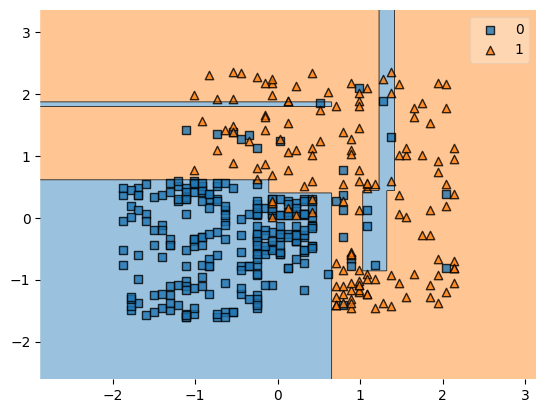

In [20]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
dataset=pd.read_csv("Salary_data.csv")
dataset.head(3)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731


In [9]:
dataset.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

In [10]:
x=dataset.iloc[:,:-1]
y=dataset["Salary"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeRegressor , plot_tree

In [14]:
dr=DecisionTreeRegressor() #there is no gini,entropy,log_loss but pruning can be done
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [15]:
dr.score(x_test,y_test)*100

80.21759743735161

In [16]:
dr.score(x_train,y_train)*100

99.99631319936537

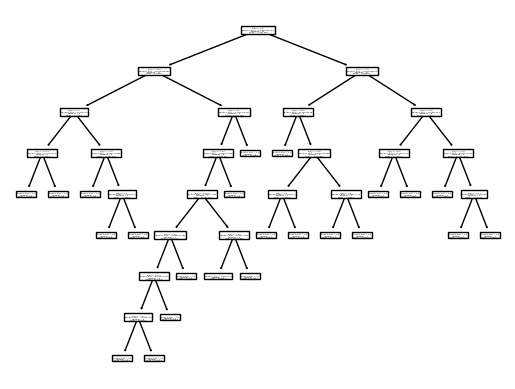

In [17]:
plot_tree(dr)
plt.show()

K - NEAREST NEIGHBOUR ALGORITHM

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("Social_Network_ads.csv")
dataset.head(3)